# Segunda parte

1. Filtrar el DataFrame para incluir únicamente las filas correspondientes a los ganadores de medallas de 2016 en los deportes mencionados en la descripción de la actividad

2. Observe las características del conjunto de datos y anote su tipo de datos: ¿son categóricos o numéricos?

3. Evaluar cuál sería la visualización adecuada para que un patrón global represente las características de height y weight

4. Evaluar cuál sería la visualización adecuada para representar las estadísticas resumidas de las características de height y weight en función de las medallas, separadas además por género de los atletas.

In [1]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import mean
warnings.filterwarnings('ignore')
df = pd.read_csv('athlete_events.csv')
df2016m =  df.query('Year == 2016')
df2016m =  df2016m[df2016m['Medal'].notna()]
sports = ['Athletics', 'Swimming', 'Rowing', 'Football', 'Hockey']
df2016m = df2016m[df2016m['Sport'].isin(sports)]
df2016m.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
814,465,"Matthew ""Matt"" Abood",M,30.0,197.0,92.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Bronze
1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
1529,846,Valerie Kasanita Adams-Vili (-Price),F,31.0,193.0,120.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's Shot Put,Silver
1847,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 50 metres Freestyle,Bronze


In [2]:
df2016m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 732 entries, 158 to 271019
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      732 non-null    int64  
 1   Name    732 non-null    object 
 2   Sex     732 non-null    object 
 3   Age     732 non-null    float64
 4   Height  729 non-null    float64
 5   Weight  727 non-null    float64
 6   Team    732 non-null    object 
 7   NOC     732 non-null    object 
 8   Games   732 non-null    object 
 9   Year    732 non-null    int64  
 10  Season  732 non-null    object 
 11  City    732 non-null    object 
 12  Sport   732 non-null    object 
 13  Event   732 non-null    object 
 14  Medal   732 non-null    object 
dtypes: float64(3), int64(2), object(10)
memory usage: 91.5+ KB


In [3]:
df2016m.describe()

,ID,Age,Height,Weight,Year
count,732.000000,732.000000,729.000000,727.000000,732.0
mean,68648.244536,25.577869,180.023320,73.720770,2016.0
std,39361.251654,4.451373,10.076398,14.279014,0.0
min,62.000000,16.000000,150.000000,40.000000,2016.0
25%,32676.750000,22.000000,173.000000,64.000000,2016.0
50%,73187.000000,25.000000,180.000000,72.000000,2016.0
75%,103225.000000,29.000000,187.000000,82.000000,2016.0
max,135525.000000,40.000000,207.000000,136.000000,2016.0


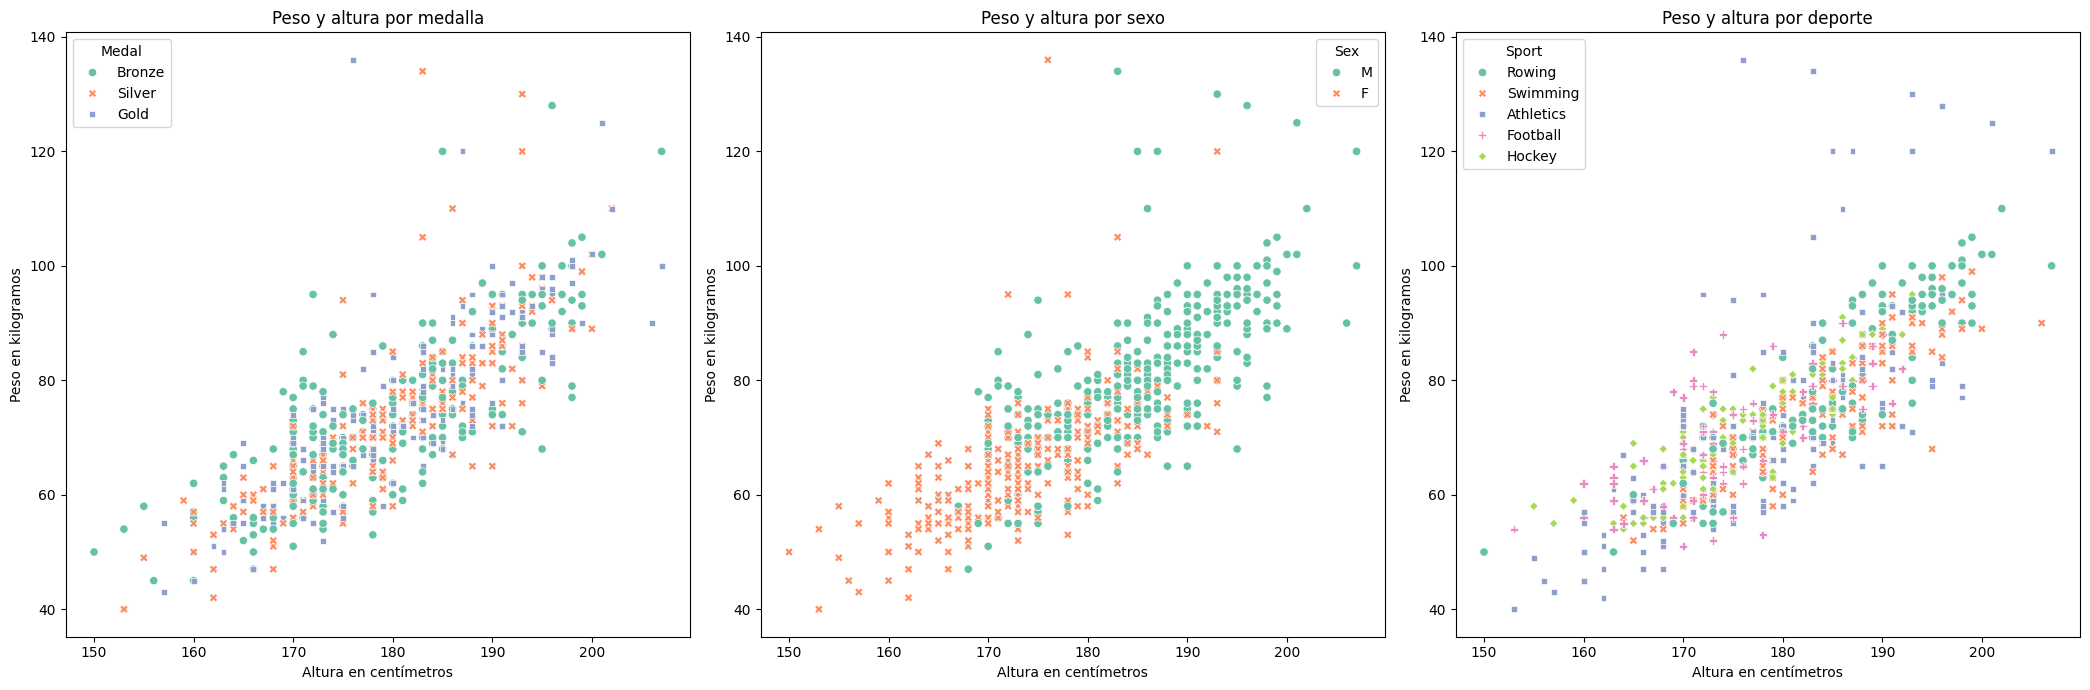

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(21, 7))

sns.scatterplot(data=df2016m, x="Height", y="Weight", hue="Medal", palette="Set2", style="Medal", ax=axes[0])
axes[0].set(title="Peso y altura por medalla", xlabel="Altura en centímetros", ylabel="Peso en kilogramos")


sns.scatterplot(data=df2016m, x="Height", y="Weight", hue="Sex", palette="Set2", style="Sex", ax=axes[1])
axes[1].set(title="Peso y altura por sexo", xlabel="Altura en centímetros", ylabel="Peso en kilogramos")

sns.scatterplot(data = df2016m, x = df2016m['Height'], y = df2016m['Weight'], hue = df2016m['Sport'], palette = 'Set2', style = df2016m['Sport'], ax = axes[2])
axes[2].set(title = 'Peso y altura por deporte', xlabel = 'Altura en centímetros', ylabel = 'Peso en kilogramos')

plt.tight_layout()

plt.show()

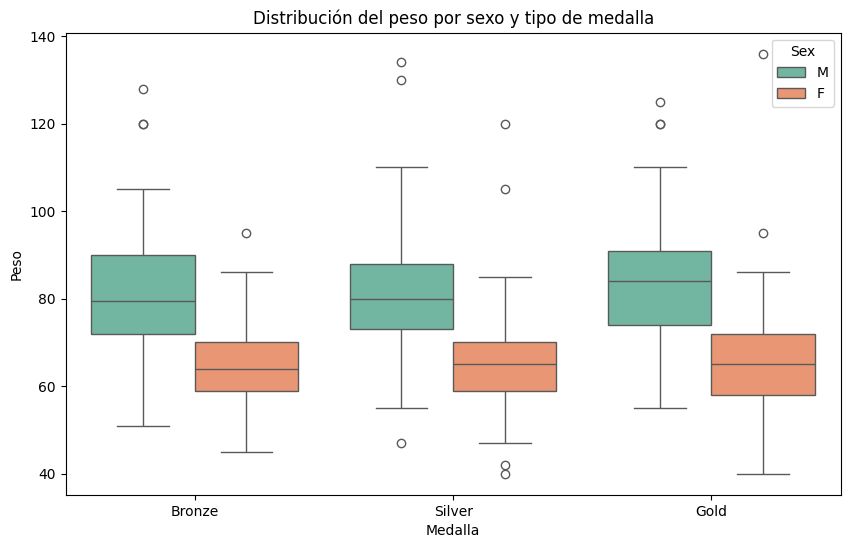

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Medal", y="Weight", hue="Sex", data=df2016m, palette="Set2")
ax.set(xlabel="Medalla", ylabel="Peso", title="Distribución del peso por sexo y tipo de medalla")
plt.show()

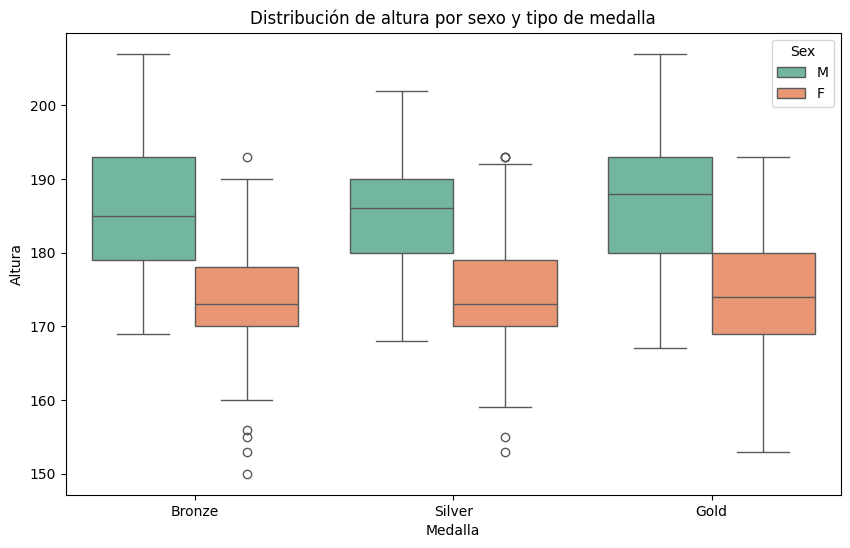

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x="Medal", y="Height", hue="Sex", data=df2016m, palette="Set2")
ax.set(xlabel="Medalla", ylabel="Altura", title="Distribución de altura por sexo y tipo de medalla")
plt.show()